Generated graph with 24 nodes and 57 edges


Is directed acyclic graph: True


Is connected graph: True


Contamination sources: [1]


Contamination emission time patterns:


Node 1 : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


C:\Users\A\AppData\Local\Temp\ipykernel_10568\2139895965.py:94: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sources = random.sample(G.nodes(), num_sources)


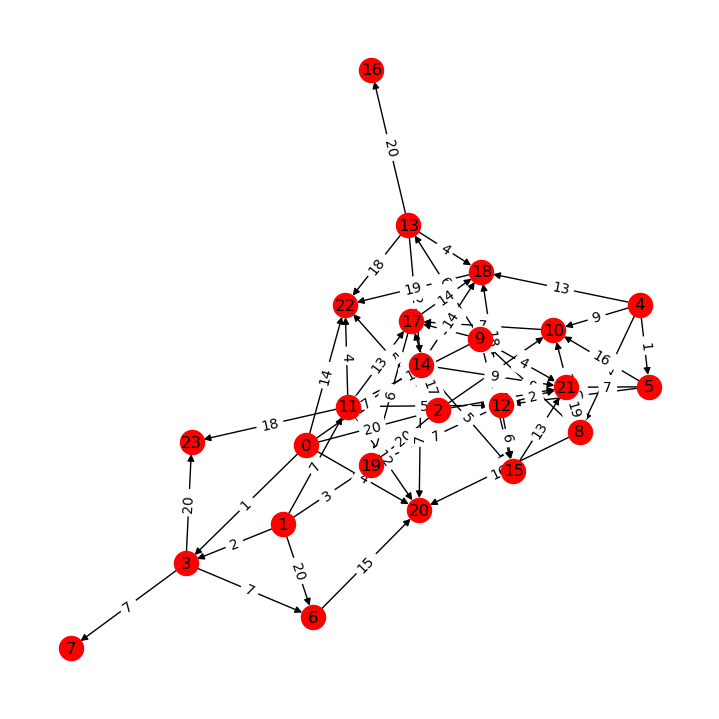

C:\Users\A\AppData\Local\Temp\ipykernel_10568\2139895965.py:153: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sensed_nodes = random.sample(G.nodes(), num_sensors)


Los nodos sensados fueron:  [5, 6, 16]


Los nodos sensados como contaminados fueron:  [6]
Los nodos sensados como limpios fueron:  [5, 16]




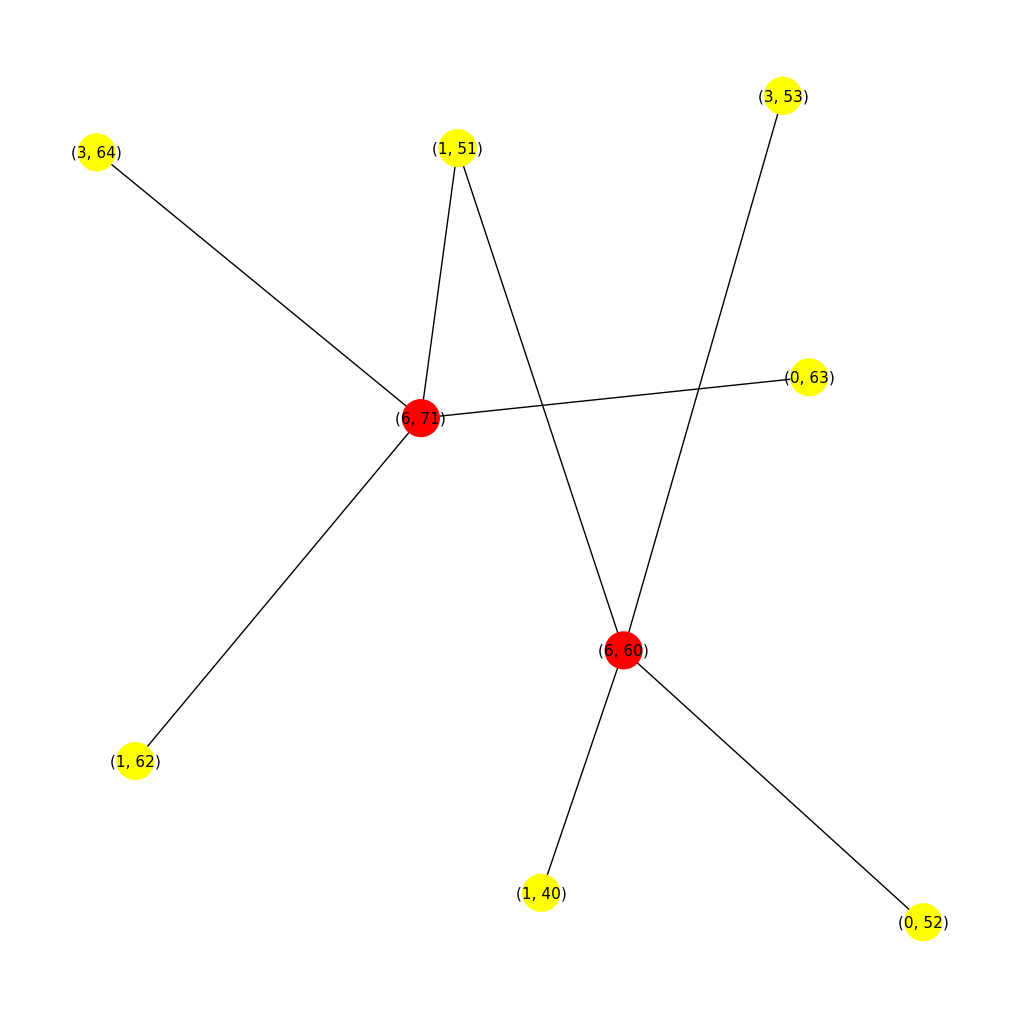

###########################################################################################################


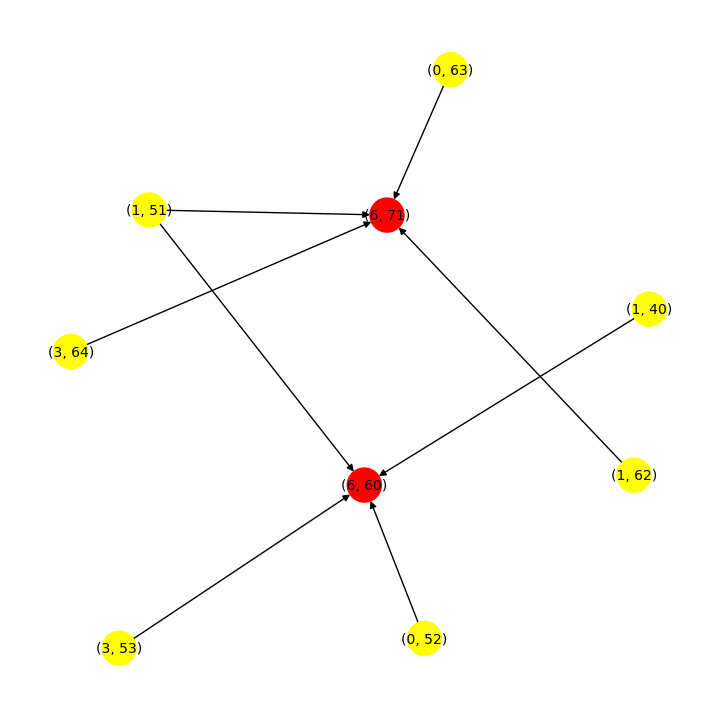

###########################################################################################################


C:\ProgramData\Anaconda3\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
C:\Users\A\AppData\Local\Temp\ipykernel_10568\2139895965.py:468: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sel_nodo = random.sample(origin_nodes_copy,contador)
C:\ProgramData\Anaconda3\lib\site-packages\pulp\pulp.py:1704: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


Todas las posibles soluciones son:  [[[(1, 51)]]]


El número total de soluciones óptimas es de:  1


Duration: 0:00:02.216087


In [10]:
from datetime import datetime
import random
import networkx as nx
import numpy as np
import pickle
import matplotlib.pyplot as plt
from networkx.classes.function import path_weight
from networkx.drawing.nx_agraph import graphviz_layout
########################################################################################
start_time = datetime.now()
########################################################################################

# Generate an Erdős-Rényi graph with n nodes and edge probability p
n = random.choice(range(15, 25))
p = 0.20
graph = nx.erdos_renyi_graph(n, p)

# Turn the graph into an acyclic graph
acyclic_graph = nx.DiGraph()

# Copy nodes from original graph to acyclic graph
for node in graph.nodes():
    acyclic_graph.add_node(node)

# Copy edges from original graph to acyclic graph
for edge in graph.edges():
    # Check if adding this edge creates a cycle
    acyclic_graph.add_edge(edge[0], edge[1])
    if nx.is_directed_acyclic_graph(acyclic_graph):
        continue
    else:
        # If adding the edge creates a cycle, remove it
        acyclic_graph.remove_edge(edge[0], edge[1])

Gk = acyclic_graph.to_undirected()
subgraphs = [Gk.subgraph(c) for c in nx.connected_components(Gk)]
if len(subgraphs) > 1:
    contad = 0
    bool_a = True

    while bool_a == True and contad < len(subgraphs):
        for n, i in enumerate(subgraphs):
            bool_b = True
            contad += 1
            if n+1 < len(subgraphs):
                lista_de_nodos = list(subgraphs[n+1].nodes())
                sub_gi_nodes = list(i.nodes())
                j = random.sample(sub_gi_nodes, 1)
                while bool_b == True:
                    s1 = random.sample(lista_de_nodos, 1)
                    if not nx.has_path(Gk, s1[0], j[0]):
                        Gk.add_edge(j[0], s1[0])
                        bool_b = False
                    if nx.has_path(Gk, s1[0], j[0]):
                        lista_de_nodos.remove(s1[0])  
                    if len(lista_de_nodos) == 0:
                        lista_de_nodos = list(subgraphs[n+1].nodes())
                        sub_gi_nodes.remove(j[0])
                        if len(sub_gi_nodes) == 0:
                            bool_a = False
                            break
                        j = random.sample(sub_gi_nodes, 1)

            if nx.is_connected(Gk):
                bool_a = False
                break
        
        G_new = Gk.to_directed()
        edges_to_delete = []
        for i in list(G_new.edges()):
            for j in list(G_new.edges()):
                if i[0] == j[1] and i[1] == j[0] and i not in edges_to_delete and G_new.in_degree(j[0]) >= G_new.in_degree(i[0]):
                    edges_to_delete.append(j)
        G_new.remove_edges_from(edges_to_delete)
    
if len(subgraphs) > 1:
    G = G_new.copy()
if len(subgraphs) == 1:
    G = acyclic_graph.copy()

# Print information about the graph
print("Generated graph with {} nodes and {} edges".format(G.number_of_nodes(), G.number_of_edges()))
print('\n')
print("Is directed acyclic graph: {}".format(nx.is_directed_acyclic_graph(G)))
print('\n')
print("Is connected graph: {}".format(nx.is_weakly_connected(G)))
print('\n')

#############################################################################################

# Select random source nodes and assign contamination emission time patterns
#num_sources = random.randint(1, 2)
num_sources = 1
sources = random.sample(G.nodes(), num_sources)

emission_times = {}
for source in sources:
    n_emissions = random.randint(1, 2)
    times = [0] * 100
    for i in range(n_emissions):
        t = random.randint(0, 99)
        times[t] = 1
    emission_times[source] = times

# Adding contamination time patterns and contamination status patterns to the nodes
for i in G.nodes():
    G.add_node(i , vertido = np.zeros(100,dtype=np.int32), estados = np.zeros(100,dtype=np.int32))
    if i in sources:
        G.nodes[i]['vertido'] = emission_times[i].copy()
        G.nodes[i]['estados'] = emission_times[i].copy()
            
# Assign random weights between 1 and 20 to the edges
for u, v in G.edges():
    G[u][v]['weight'] = random.randint(1, 20)

print("Contamination sources:", sources)
print('\n')
print("Contamination emission time patterns:")
print('\n')
for source, times in emission_times.items():
    print("Node", source, ":", times)
    
# Printing the graph
pos = graphviz_layout(G, prog='fdp')
plt.figure(figsize=(7,7))
nx.draw(G,with_labels=True,node_color='red', pos=pos)  
edge_labels = nx.get_edge_attributes(G,'weight')
formatted_edge_labels = {(elem[0],elem[1]):edge_labels[elem] for elem in edge_labels} 
nx.draw_networkx_edge_labels(G,pos,edge_labels=formatted_edge_labels,font_color='black')
plt.show() 

############################################################################################
# Simulating flow of contamination on the graph (Direct Problem)
############################################################################################

pesos = []
for i in sources:
    for k in nx.algorithms.descendants(G, i):
        caminos = list(nx.all_simple_paths(G, i, k))
        for camino in caminos:
            peso = path_weight(G, camino, weight="weight")
            pesos.append(peso)
            for time, state in enumerate(G.nodes[i]['vertido']):
                if state == 1 and time + peso < 100:
                    G.nodes[k]['estados'][time + peso] = 1

###########################################################################################
# Inference (Inverse Problem)
###########################################################################################

# Selecting nodes that will act as sensors:
num_sensors = random.randint(2, 5)
sensed_nodes = random.sample(G.nodes(), num_sensors) 
for ind, i in enumerate(sensed_nodes):
    if i in sources:
        sensed_nodes.pop(ind)
        new_sensed_node = random.sample(G.nodes(), 1)
        sensed_nodes.append(new_sensed_node[0])

sensed_nodes_clean = []
sensed_nodes_cont = []
t_max = 100
cont_pat = []
         
# esto es para diferenciar entre nodos medidos como contaminados o limpios:
  
print('Los nodos sensados fueron: ', sensed_nodes)
print('\n')

for i in sensed_nodes:
    if 1 in G.nodes[i]['estados']:
        sensed_nodes_cont.append(i)
    else:
        sensed_nodes_clean.append(i)

for i in sensed_nodes_cont:
    cont_pat.append(G.nodes[i]['estados'])

print('Los nodos sensados como contaminados fueron: ', sensed_nodes_cont)    
print('Los nodos sensados como limpios fueron: ', sensed_nodes_clean)
print('\n')

# If no measured node was seen as contaminated and therefore no contamination was registered
if len(sensed_nodes_cont) == 0:
    print('NO SE REGISTRO CONTAMINACION')
    
    
# esto es para remover los nodos medidos contaminados que son predecesores directos de otros nodos medidos contaminados:          
k_nodes = sensed_nodes_cont.copy()
u = []
l = []
exp_nodes = []
for i in range(len(k_nodes)):
    for t in range(len(k_nodes)): 
        if i != t:
            p = list(nx.all_simple_paths(G,k_nodes[i], k_nodes[t]))  
            for k in p:
                sum_t = 0
                for w in range(len(k)-1):  
                    sum_t = sum_t + G[k[w]][k[w+1]]['weight']
                      
                for h, num in enumerate(G.nodes[k[0]]['estados']):
                    if num == 1:
                        u.append(h)
                for a, zed in enumerate(G.nodes[k[-1]]['estados']):
                    if zed == 1:
                        l.append(a)

                for r in range(len(l)):
                    for y in range(len(u)):
                        if l[r] - u[y] == sum_t:
                            if k[-1] not in exp_nodes:
                                exp_nodes.append(k[-1])
                                
                l.clear()
                u.clear()

for i in exp_nodes:
    f = k_nodes.index(i)
    cont_pat.pop(f)
    k_nodes.remove(i)

#######################################################################################################################
# aqui empiezo a crear el nuevo grafo de las conexiones directas:

# Times in which a measured node showed contamination:
cont_times = []
full_paths = []

for j in range(len(cont_pat)):
    for i, state in enumerate(cont_pat[j]):
        if state == 1:
            cont_times.append(tuple([k_nodes[j],i]))

# Negative information:
neg_inf_imp_source_nodes = []          
for t in sensed_nodes_clean:
    for i in G.nodes(): 
        nodos_previos = []
        same_path = False
        path_list_clean = list(nx.all_simple_paths(G, i, t))
        path_list_cont = []
        for k in sensed_nodes_cont:
            path_list_cont.append(list(nx.all_simple_paths(G, i, k)))
        for w in path_list_clean:
            for y in w:
                if y != t:
                    nodos_previos.append(y)
        for h in nodos_previos:
            for g in path_list_cont:
                for f in g:
                    if h in f:
                        same_path = True            
        if t in nx.algorithms.descendants(G, i) and i not in neg_inf_imp_source_nodes and same_path == False:            
            neg_inf_imp_source_nodes.append(i)

neg_inf_pos_source_nodes = []

for i in G.nodes():
        if i not in neg_inf_imp_source_nodes and i not in sensed_nodes_clean:
            neg_inf_pos_source_nodes.append(i)
            
# funcion para encontrar las posibles conexiones directas en base a los pesos totales posibles:

def path_finder(source, target):
    dsa = list(nx.all_simple_paths(G, source, target))
    
    c_weights = []

    for i in dsa:
        sum_w = 0
        for t in range(len(i)-1):
            sum_w += G[i[t]][i[t+1]]['weight']
        c_weights.append(sum_w)   
        
    path_pos = []
    path_weight = []
    
    # recurrencia para crear las listas de nodos, enlaces y caminos del nuevo grafo:
        
    for z in range(100):
            for i, weight in enumerate(c_weights):
                if (target, weight + z) in cont_times:
                    #path_pos.append(i)
                    path_weight.append(weight)
                    full_paths.append([dsa[i],weight + z,z])
   

 # funcion para caminar sobre todo el grafo usando el path_finder:
def create_Gf():
    for i in k_nodes:
        for t in neg_inf_pos_source_nodes:
            path_finder(t,i)
create_Gf()

##########################################################################################

# Se crea el grafo bipartido

o_nodes = []
for i in full_paths:
    if (i[0][0],i[2]) not in o_nodes: 
        o_nodes.append((i[0][0],i[2]))
            
Gf = nx.Graph()
Gf.add_nodes_from(cont_times, bipartite=1)
Gf.add_nodes_from(o_nodes, bipartite=0)

for j in full_paths:
    Gf.add_edge((j[0][0],j[2]),(j[0][-1],j[1]))
    
pos = graphviz_layout(Gf, prog='fdp')

color_map = []
for node in Gf:
    if node in cont_times:
        color_map.append('red')
    else: 
        color_map.append('yellow') 
                 
plt.figure(figsize=(10,10)) 
nx.draw(Gf,with_labels=True,node_color=color_map, edge_cmap=plt.cm.Blues,pos=pos, 
        node_size=700,font_size=11)

plt.show()
print('###########################################################################################################')   
    
# Se convierte el grafo bipartido no direccionado en uno direccionado, borrando los dobles enlaces:

Gs = nx.DiGraph(Gf)

edges_to_delete = []
for i in o_nodes:
    for j in list(Gs.edges()):
        if i == j[1] and i not in edges_to_delete:
            edges_to_delete.append(j)
Gs.remove_edges_from(edges_to_delete)
    
#############################################################################################

# Imports y definiciones a usar en el ILP:
import pulp
import itertools
solutions_per_subgraph = []
total_solutions = []
combination = []
self_origin = False

# Se empiezan a sacar los subgrafos bipartitos del grafo bipartito original: 

Gk = Gs.to_undirected()
subgraphs = (Gk.subgraph(c) for c in nx.connected_components(Gk))

for i in subgraphs:
    
    Gh = nx.DiGraph(i)
    orig_nodes = []
    contam_nodes = []
    
    for i in Gh.nodes():
        if i in cont_times:
            contam_nodes.append(i)
        else:
            orig_nodes.append(i)
    
    # En caso de que un nodo sensado haya sido fuente de contaminacion:
    for i in contam_nodes:
        if Gh.out_degree(i) == 0:
            self_origin = True
            print('El nodo ',i, ' probablemente fue un origen de contaminación él mismo.')
            print('\n')
    
    Gh.add_nodes_from(contam_nodes, bipartite=1)
    Gh.add_nodes_from(orig_nodes, bipartite=0)
    
    edges_to_delete = []
    for i in o_nodes:
        for j in list(Gh.edges()):
            if i == j[1] and i not in edges_to_delete:
                edges_to_delete.append(j)
    Gh.remove_edges_from(edges_to_delete)
    
    position = graphviz_layout(Gh, prog='fdp')

    color_map = []
    for node in Gh:
        if node in cont_times:
            color_map.append('red')
        else: 
            color_map.append('yellow') 

    plt.figure(figsize=(7,7)) 
    nx.draw(Gh,with_labels=True,node_color=color_map,pos=position, 
            node_size=600,font_size=10)
    plt.show()
    
    print('###########################################################################################################')
    
    bool_var = False
    
    for i in orig_nodes:
        if Gh.out_degree(i) > 1:
            bool_var = True
                   
    # Problema de optimizacion con ILP:
    
    # Create the ILP problem
    problem = pulp.LpProblem('Smallest set of origin nodes', pulp.LpMinimize)

    # Create the decision variables
    origin_nodes = set(n for n, d in Gh.nodes(data=True) if d['bipartite']==0)
    x = pulp.LpVariable.dicts('x', origin_nodes, lowBound=0, upBound=1, cat=pulp.LpInteger)

    # End nodes
    end_nodes = set(n for n, d in Gh.nodes(data=True) if d['bipartite']==1)

    # Define the objective function

    problem += pulp.lpSum(x)

    # Define the constraints
    for j in Gh.nodes():
        if Gh.nodes[j]['bipartite'] == 1:  # end node
            problem += pulp.lpSum(x[i] for i in Gh.predecessors(j)) >= 1

    solutions = []
    sel_nodos = []
    or_nod = set(origin_nodes)
    contador = 1
    origin_nodes_copy = origin_nodes.copy()
    iterator = 0
    op_sol_len = 0
    sel_nodo = []

    while bool_var == True and contador <= (len(origin_nodes)/2):
        # Solve the ILP
        if len(sensed_nodes_cont) == 0:
            break
        status = problem.solve()

        if iterator == 0:
            op_sol_len = len([i for i in origin_nodes if x[i].value() == 1])

        # Check if the problem is infeasible or unbounded
        if status != 1:
            print('status not optimal')
            print('\n')
            break
        if [i for i in origin_nodes if x[i].value() == 1] not in solutions and len([i for i in origin_nodes if x[i].value() == 1]) == op_sol_len:
            solutions.append([i for i in origin_nodes if x[i].value() == 1])
            #print(solutions)

        iterator = iterator + 1

        # Multiplicidad seleccionando nodos a botar aleatoriamente e iterando sobre la cantidad de nodos que se botan:
        X=[]
        Y=[]

        if all(x in sel_nodos for x in origin_nodes):
            #print(contador)
            contador = contador + 1
            sel_nodos.clear()

        if len(origin_nodes_copy) == 0 : 
            origin_nodes_copy = origin_nodes.copy()

        if len(origin_nodes_copy)> contador:    
            sel_nodo = random.sample(origin_nodes_copy,contador)
        else:
            for i in origin_nodes_copy:
                sel_nodo.append(i)
        #print(sel_nodo)

        for i in sel_nodo: 
            if i in origin_nodes_copy:
                origin_nodes_copy.remove(i)
            if i not in sel_nodos:
                sel_nodos.append(i)   
        #print(sel_nodos)

        for i in origin_nodes:
            if i in sel_nodo:
                Y.append(1.001*x[i])
            else:
                X.append(x[i])

        problem += pulp.lpSum(X+Y)  
        
    # Se guardan las soluciones particulares de cada subgrafo bipartito:
    if bool_var == False and self_origin == False:
        solutions_per_subgraph.append(orig_nodes)
    
    if bool_var == False and self_origin == True:
        solutions_per_subgraph.append(end_nodes)
        
    if bool_var == True:
        solutions_per_subgraph.append(solutions)
                           
#Se hace la combinatoria entre las soluciones particulares de cada subgrafo:

if len(solutions_per_subgraph) > 1:        
    combination = [p for p in itertools.product(*solutions_per_subgraph)]
    print('El número total de soluciones óptimas es de: ', len(combination))
    print('\n')
    print('Todas las posibles soluciones son: ', combination)
    print('\n')
    s_zero = []
    par_sol = []
    
    # Para determinar las soluciones mas parsimoniosas espacialmente:
    for i in combination:
        true = 1
        for j in i:
            if len([j][0]) > 1:
                s_zero.append([j][0][0])
            if len([j][0]) == 1: 
                s_zero.append([j][0])
        for k in s_zero:
            if k != s_zero[0]:
                true = 0
        if true == 1:
            par_sol.append(i)
        s_zero.clear()

    print('Soluciones con parsimonia espacial: ', par_sol)
    print('\n')
    
# Soluciones cuando se tiene un solo subgrafo bipartito de un solo end_node:    
if len(solutions_per_subgraph)  == 1 and len([solutions_per_subgraph[0][0]]) == 1:
    print('Todas las posibles soluciones son: ', solutions_per_subgraph)
    print('\n')
    print('El número total de soluciones óptimas es de: ', len(solutions_per_subgraph[0]))
    print('\n')   
    
    
# Soluciones cuando se tiene un solo subgrafo bipartito de mas de un end_node:       
if len(solutions_per_subgraph)  == 1 and len([solutions_per_subgraph[0][0]]) > 1:
    print('Todas las posibles soluciones son: ', solutions_per_subgraph)
    print('\n')
    print('El número total de soluciones óptimas es de: ', len(solutions_per_subgraph[0]))
    print('\n')   
    
    # Para determinar las soluciones mas parsimoniosas espacialmente:
    for i in [solutions_per_subgraph[0]]:
        true = 1
        for j in i:
            if len([j][0]) > 1:
                s_zero.append([j][0][0])
            if len([j][0]) == 1: 
                s_zero.append([j][0])
        for k in s_zero:
            if k != s_zero[0]:
                true = 0
        if true == 1:
            par_sol.append(i)
        s_zero.clear()

    print('Soluciones con parsimonia espacial: ', par_sol)
    print('\n')
        
#############################################################################################

# Time required to run the program
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

In [11]:
solutions_per_subgraph

[[[(1, 51)]]]